# Indian Startup Ecosystem for 2019

For importing libraries necessary for the project, and for basic preprocessing functions 

We're going to import commonly used Data Science libraries, so make sure they're available for your Python set-up.

Sections Included:

- Imports
- Data Loading
- Data Exploration
- Data Cleaning

## Imports

For importing libraries necessary for the project, and for basic preprocessing functions

In [2]:
# Import libraries necessary for projects
import numpy as np
import pandas as pd 

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt 

# pretty display for notebooks
%matplotlib inline

# visualize missing data
import missingno as msno

# imputation approach
from sklearn.impute import SimpleImputer

## Data Loading

For loading data files into appropriate variables.

In [3]:
# Loading the data file (ex: csv) using pandas
data_2019 = pd.read_csv('../data/csv/startup_funding2019.csv')

## Data Exploration

Section for **exploratory analysis** on the available data. 

The exploration techniques vary for numerical, categorical, or time-series variables. Currently, 

Here we typically:

- look at example records in the dataset
- investigate the datatypes of variables in the dataset
- calculate and investigate descriptive statistics (ex: central tendencies, variability etc.)

Common steps to check the health of the data:

- Check for missing data
- Check the skewness of the data, outlier detection
- etc...

### Look at Example Records

In [4]:
 # display 10 random rows from the dataset 
data_2019.sample(10)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
68,Licious,2015.0,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,"$25,000,000",Series D
80,Ola,2010.0,Bangalore,Transportation,It enables one to book cab online,"Bhavish Aggarwal, Ankit Bhati","Kia Motors, Hyundai","$311,000,000",NaN
72,CarDekho,2008.0,Jaipur,Automobile,Enables people to buy and sell new/old cars.,Amit Jain,"Ping An Global Voyager Fund, Hillhouse Capital...","$70,000,000",Series D
67,Cuemath,2013.0,Bangalore,Edtech,It helps students to learn math online,Manan Khurma,"Manta Ray Ventures Limited, Google’s Capital G...","$5,500,000",NaN
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,"$275,000,000",Series G
49,Awign Enterprises,2016.0,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...","$4,000,000",Series A
62,PiBeam,NaN,Chennai,Automotive tech,It is engaged in building sustainable and affo...,Visakh Sasikumar,GAIL (India) Ltd,"$50,000,000",NaN
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
77,Sarva,NaN,Chennai,Yoga & wellness,It drives a cultural change in making yoga-bas...,Sarvesh Shashi,"Venture fund, Fireside Ventures.","$2,800,000",NaN
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN


### Data-types, completeness Information

Using the Pandas "info" function, in addition to the data-type information for the dataset, we can look at counts of available records/missing records too.

In [5]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


### comprehensive summary of missing data in the dataset
This approach allows you to easily identify columns with a high percentage of missing values, which may require further investigation or imputation strategies.

In [6]:
# Calculate the count of missing values for each column
missing_values = data_2019.isnull().sum()

# Calculate the total number of rows in the dataset
total_rows = len(data_2019)

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / total_rows) * 100

# Create a DataFrame to display the missing values count and percentage for each column
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Print the missing data summary
print(missing_data_summary)

               Missing Values  Percentage Missing
Company/Brand               0            0.000000
Founded                    29           32.584270
HeadQuarter                19           21.348315
Sector                      5            5.617978
What it does                0            0.000000
Founders                    3            3.370787
Investor                    0            0.000000
Amount($)                   0            0.000000
Stage                      46           51.685393


### Descriptive Statistics

In [7]:
# Descriptive statistics for all columns
data_2019.describe(include='all')

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
count,89,60.000000,70,84,89,86,89,89,43
unique,87,NaN,17,52,88,85,86,50,15
top,Kratikal,NaN,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,NaN,21,7,2,2,3,12,10
mean,NaN,2014.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables in the dataset

In [8]:
# check the columns 
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

### Outlier Detection

The presence of outliers can often skew results which take into consideration these data points. 

One approach to detect outliers is to use Tukey's Method for identfying them: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

One such pipeline for detecting outliers is below:

In [9]:
def find_outliers(data, features_to_investigate):
    outliers = []
    
    for feature in features_to_investigate:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        step = (Q3 - Q1) * 1.5
        out = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
        outliers.extend(out.index.values)
        
    outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
    
    return outliers

## Data Cleaning

### Renaming columns

In [10]:
# define the new column names
new_columns = ['Company Name', 'Year Founded', 'Headquarter', 'Sector', 'Business Description', 'Founders', 'Investor', 'Funding Amount ($)', 'Funding Round']

# Rename the columns in the dataframe
data_2019 = data_2019.rename(columns=dict(zip(data_2019.columns, new_columns)))

In [11]:
data_2019.head()

,Company Name,Year Founded,Headquarter,Sector,Business Description,Founders,Investor,Funding Amount ($),Funding Round
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


### Investigating missing Values

In [12]:
# total missing values
print("\nThe total missing values: ", data_2019.isnull().sum().sum())
print("")

# missing values per column
print(data_2019.isnull().sum())


The total missing values:  102

Company Name             0
Year Founded            29
Headquarter             19
Sector                   5
Business Description     0
Founders                 3
Investor                 0
Funding Amount ($)       0
Funding Round           46
dtype: int64


#### Visualizing missing values

In [13]:
def plot_missing_values_heatmap(dataframe):
    # Creating a DataFrame indicating missing values
    missing_values = dataframe.isnull()
    # Plotting the missing values heatmap
    sns.heatmap(missing_values, cmap='viridis')
    # Setting plot properties
    plt.title('Missing Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    # Display the plot
    plt.show()

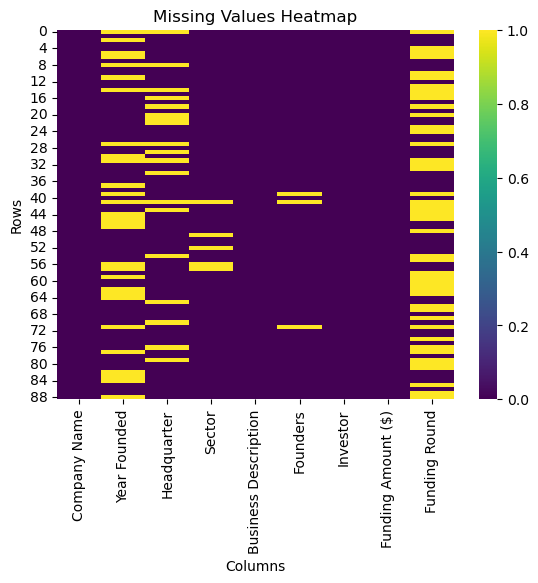

In [14]:
plot_missing_values_heatmap(data_2019)

## Exploration Data Analysis

In [15]:
# Function to calculate descriptive statistics of a variable
def calculate_descriptive_stats(variable):
    return variable.describe()

# Function to plot the data distribution of a variable using a histogram
def plot_data_distribution(variable):
    plt.hist(variable)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Function to check for missing values in a variable
def check_missing_values(variable):
    return variable.isnull().sum()

# check for duplicates of categorical values
def check_categorical_duplicates(data, variable):
    duplicates = data[variable].duplicated()
    duplicated_rows = data[duplicates]
    print('\n\n')
    print("Number of duplicates in '{}' variable: {}".format(variable, len(duplicated_rows)))
    print("\n")
    if not duplicated_rows.empty:
        print("Duplicate Rows:")
        print(duplicated_rows.head())
    return duplicated_rows


# detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Function to perform univariate analysis on a variable
def perform_univariate_analysis(variable):
    # Descriptive Statistics
    print("Descriptive Statistics:")
    print(calculate_descriptive_stats(variable))
    print()

    
    # Missing Values
    print("Missing Values:")
    print(check_missing_values(variable))
    print()


## **Company Name Exploration**

The **company name** variable is a categorical variable. It represents the names of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Number of Company Names
- Remove leading, trailing spaces and Standardize case
- Detect duplicates
- Handle missing values

### Data Exploration and Descriptive Statistics

In [16]:
# Calculate the count of unique company names
unique_company_count = data_2019['Company Name'].nunique()
print("Count of Unique Company Names: {}".format(unique_company_count))

# Examine the most common company names
company_name_counts = data_2019['Company Name'].value_counts()
most_common_names = company_name_counts[company_name_counts == company_name_counts.max()]
print("\nMost Common Company Name(s):")
print(most_common_names)

Count of Unique Company Names: 87

Most Common Company Name(s):
Company Name
Kratikal    2
Licious     2
Name: count, dtype: int64


### Number of Company Names

In [17]:
# Calculate the count of unique company names
unique_company_count = data_2019['Company Name'].nunique()
print("Count of Unique Company Names: {}".format(unique_company_count))

Count of Unique Company Names: 87


### Remove leading, trailing spaces and Standardize case

In [18]:
# Remove leading and trailing spaces from the 'Company Name' column
data_2019['Company Name'] = data_2019['Company Name'].str.strip()

# standardize city name to lower case
data_2019['Company Name'] = data_2019['Company Name'].str.title()

### Detect Duplicates

In [19]:
# check duplicates
check_categorical_duplicates(data_2019, 'Company Name')




Number of duplicates in 'Company Name' variable: 2


Duplicate Rows:
   Company Name  Year Founded    Headquarter      Sector  \
68      Licious        2015.0      Bangalore        Food   
82     Kratikal           NaN  Uttar pradesh  Technology   

                 Business Description                    Founders  \
68                   Online meat shop  Vivek Gupta, Abhay Hanjura   
82  Provides cyber security solutions              Pavan Kushwaha   

                                     Investor Funding Amount ($) Funding Round  
68                            Vertex Ventures        $25,000,000      Series D  
82  Gilda VC, Art Venture, Rajeev Chitrabhanu         $1,000,000  Pre-series A  


,Company Name,Year Founded,Headquarter,Sector,Business Description,Founders,Investor,Funding Amount ($),Funding Round
68,Licious,2015.0,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,"$25,000,000",Series D
82,Kratikal,NaN,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A


### Handle missing values

In [20]:
# Check missing values
check_missing_values(data_2019['Company Name'])

0

## **Year Founded Exploration**

**The "Year Founded"** variable is a quantitative variable representing the year in which each company was founded.
- Validate data format
- Handle missing values
- Identifying Outliers

### Handle the missing values

In [21]:
# Create an instance of the SimpleImputer with the median strategy
array = data_2019['Year Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the 'Year Founded' column and transform the column to impute missing values
data_2019['Year Founded'] = imputer.fit_transform(array)

### Validate data format

In [22]:
# Convert the 'Year Founded' column to integer
data_2019['Year Founded'] = data_2019['Year Founded'].astype(int)

In [23]:
data_2019['Year Founded'].head()

0    2015
1    2014
2    2015
3    2014
4    2004
Name: Year Founded, dtype: int32

### Detect Duplicates

In [24]:
# check duplicates
check_categorical_duplicates(data_2019, 'Year Founded')




Number of duplicates in 'Year Founded' variable: 77


Duplicate Rows:
  Company Name  Year Founded Headquarter           Sector  \
2     Eduisfun          2015      Mumbai           Edtech   
3     Homelane          2014     Chennai  Interior design   
5     Flytbase          2015        Pune       Technology   
6        Finly          2015   Bangalore             SaaS   
8    Quantiphi          2015         NaN        AI & Tech   

                                Business Description  \
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
5                        A drone automation platform   
6  It builds software products that makes work si...   
8  It is an AI and big data services company prov...   

                       Founders  \
2                 Jatin Solanki   
3  Srikanth Iyer, Rama Harinath   
5                   Nitin Gupta   
6     Vivek AG, Veekshith C Rai   
8                Renuka Ramnath   

            

,Company Name,Year Founded,Headquarter,Sector,Business Description,Founders,Investor,Funding Amount ($),Funding Round
2,Eduisfun,2015,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,Homelane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
5,Flytbase,2015,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,Undisclosed,NaN
6,Finly,2015,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",Undisclosed,NaN
8,Quantiphi,2015,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,"$20,000,000",Series A
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,2015,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,Gomechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


## **Explore Headquarter**

**The "Headquater"** variable is a categorical variable representing the city in which each company is Located.
- Remove leading, trailing spaces and Standardize case
- Handle missing values
- Number of cities
- Examine the most common cities

### Remove leading, trailing spaces and Standardize case

In [25]:
# Standardize case
data_2019['Headquarter'] = data_2019['Headquarter'].str.title()

# Remove leading and trailing spaces
data_2019['Headquarter'] = data_2019['Headquarter'].str.strip()

### Handle the missing Values

In [26]:
# fill the null categorical values with 'Unknown'
data_2019['Headquarter'] = data_2019['Headquarter'].fillna('Unknown')

### All Headquarter cities

In [27]:
# Calculate the count of unique cities
unique_city_count = data_2019['Headquarter'].nunique()
print("Count of Unique Cities: {}".format(unique_city_count))

Count of Unique Cities: 18


### Examine the most common cities

In [28]:
# Examine the most common cities
city_counts = data_2019['Headquarter'].value_counts()
most_common_cities = city_counts[city_counts == city_counts.max()]
print("\nMost Common Cities:")
print(most_common_cities)


Most Common Cities:
Headquarter
Bangalore    21
Name: count, dtype: int64


## **Explore Sector**

 INTRO

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Clean sector name
- Remove leading, trailing spaces and Standardize case
- Handle missing values

### Data Exploration and Descriptive Statistics

In [29]:
# Calculate the count of unique sectors
unique_sector_count = data_2019['Sector'].nunique()
print("Count of Unique Sectors: {}".format(unique_sector_count))

# Examine the most common sectors
sector_counts = data_2019['Sector'].value_counts()
most_common_sectors = sector_counts[sector_counts == sector_counts.max()]
print("\nMost Common Sectors:")
print(most_common_sectors)

Count of Unique Sectors: 52

Most Common Sectors:
Sector
Edtech    7
Name: count, dtype: int64


### Clean sector names

In [30]:
# cleaning sectory names
sector_replacements = {
    'AI & Tech': 'AI',
    'Ai': 'AI',
    'Automobile & Technology': 'Automobile',
    'Automotive tech': 'Automobile',
    'Automotive Tech': 'Automobile',
    'B2B Supply Chain': 'B2B',
    'E-commerce & AR': 'E-commerce',
    'E-commerce & Ar': 'E-commerce',
    'E-Commerce & Ar': 'E-commerce',
    'Ecommerce': 'E-commerce',
    'Food & Nutrition': 'Food',
    'Food & tech': 'Food',
    'Food & Tech': 'Food',
    'Food Tech': 'Food',
    'Foodtech': 'Food',
    'Games': 'Gaming',
    'Healthcare': 'Health',
    'Healthtech': 'Health',
    'Manufacturing': 'Industrial',
    'Marketing & Customer loyalty': 'Marketing',
    'Marketing & Customer Loyalty': 'Marketing',
    'Pharmaceutical': 'Pharma',
    'Robotics & AI': 'AI',
    'Robotics & Ai': 'AI',
    'SaaS': 'Software',
    'Safety tech': 'Security',
    'Social Media': 'SocialMedia',
    'Transport & Rentals': 'Transportation',
    'Virtual Banking': 'Banking',
    'Yoga & wellness': 'Wellness',
    'Hr Tech': "Human Resource",
    'Ai & Tech': 'AI',
}
data_2019['Sector'] = data_2019['Sector'].replace(sector_replacements)

### Remove leading, trailing spaces and Standardize case

In [31]:
# Standardize case
data_2019['Sector'] = data_2019['Sector'].str.title()

# Remove leading and trailing spaces
data_2019['Sector'] = data_2019['Sector'].str.strip()

### Handle missing values

In [32]:
# Handle missing values
data_2019['Sector'] = data_2019['Sector'].fillna('Unknown')

## **Explore Business Description**

The **Intro** variable is a categorical variable. It represents the names of different companies in the dataset.

- Text cleaning

### Text cleaning

In [33]:
# Text cleaning
data_2019['Business Description'] = data_2019['Business Description'].str.replace('[^\w\s]', '')
data_2019['Business Description'] = data_2019['Business Description'].str.lower()

## **Explore Founders**

The **Intro** variable is a categorical variable. It represents the names of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove leading, trailing spaces and Standardize case
- Handle missing values

### Data Exploration and Descriptive Statistics

In [34]:
# Calculate the count of unique founder names
unique_founders_count = data_2019['Founders'].nunique()
print("Count of Unique Founders: {}".format(unique_founders_count))

# Examine the most common Founderss
founders_name_counts = data_2019['Founders'].value_counts()
most_common_founders = founders_name_counts[founders_name_counts == founders_name_counts.max()]
print("\nMost Common Founders(s):")
print(most_common_founders)

Count of Unique Founders: 85

Most Common Founders(s):
Founders
Vivek Gupta, Abhay Hanjura    2
Name: count, dtype: int64


### Remove leading, trailing spaces and Standardize case


In [35]:
# Cleaning founder names
data_2019['Founders'] = data_2019['Founders'].map(lambda x:str(x).split(',')[0])

### Handle missing values


In [36]:
# Replacing 'Unknown' with an empty string for single Founders
data_2019['Founders'] = data_2019['Founders'].replace('', 'Unknown')

# replace all the null values with 'Unknown'
data_2019['Founders'] = data_2019['Founders'].fillna('Unknown')

## **Explore Investor**

The **variable** variable is a categorical variable. It represents the names of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove leading, trailing spaces and Standardize case
- Detect duplicates
- Handle missing values

### Data Exploration and Descriptive Statistics

In [37]:
# Calculate the count of unique Investor names
unique_investors_count = data_2019['Investor'].nunique()
print("Count of Unique Investors: {}".format(unique_investors_count))

# Examine the most common Investors
investors_name_counts = data_2019['Investor'].value_counts()
most_common_Investors = investors_name_counts[investors_name_counts == investors_name_counts.max()]
print("\nMost Common Investor(s):")
print(most_common_Investors)

Count of Unique Investors: 86

Most Common Investor(s):
Investor
Undisclosed    3
Name: count, dtype: int64


### Remove leading, trailing spaces and Standardize case

In [38]:
# Cleaning Investor names
data_2019['Investor'] = data_2019['Investor'].str.strip()
data_2019['Investor'] = data_2019['Investor'].str.split(',')

# Formatting Investors
data_2019['Investor'] = data_2019['Investor'].apply(lambda x: ' & '.join([str(name).strip() for name in x]))

In [39]:
data_2019['Investor'].head(10)

0                                 Sixth Sense Ventures
1                                     General Atlantic
2     Deepak Parekh & Amitabh Bachchan & Piyush Pandey
3    Evolvence India Fund (EIF) & Pidilite Group & ...
4             Innovation in Food and Agriculture (IFA)
5                                          Undisclosed
6    Social Capital & AngelList India & Gemba Capit...
7         Gilda VC & Art Venture & Rajeev Chitrabhanu.
8                 Multiples Alternate Asset Management
9                                             SoftBank
Name: Investor, dtype: object

### Handle missing values


In [40]:
# Replacing 'Unknown' with an empty string for single Investor
data_2019['Investor'] = data_2019['Investor'].replace('','Unknown')

# replace all the null values with 'Unknown'
data_2019['Investor'] = data_2019['Investor'].fillna('Unknown')

## **Explore Funding Amount**

The **company name** variable is a categorical variable. It represents the names of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove and replacing empty spaces, leading and trailing spaces
- Handle missing values
- Visualize the distribution
- Detecting and removing Outliers

In [41]:

data_2019['Funding Amount ($)']

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
          ...     
84     $20,000,000
85    $693,000,000
86      $5,000,000
87     $50,000,000
88     $33,000,000
Name: Funding Amount ($), Length: 89, dtype: object

### Data Exploration and Descriptive Statistics

In [42]:
# Data Exploration and Descriptive Statistics
print("Descriptive Statistics:")
print(data_2019['Funding Amount ($)'].describe())
print()

Descriptive Statistics:
count              89
unique             50
top       Undisclosed
freq               12
Name: Funding Amount ($), dtype: object



### Remove and replacing empty spaces, leading and trailing spaces

In [43]:
# Remove the dollar sign
data_2019['Funding Amount ($)'] = data_2019['Funding Amount ($)'].str.replace('$','').replace(',', '', regex=True)

# Cleaning the Funding Amount ($)
data_2019['Funding Amount ($)'] = pd.to_numeric(data_2019['Funding Amount ($)'], errors='coerce')

### Handle Undisclosed Values

In [44]:
# handling undisclosed
data_2019['Funding Amount ($)'] = data_2019['Funding Amount ($)'].replace('Undisclosed', np.nan)

In [45]:
# Create an instance of the SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Year Founded' column and transform the column to impute missing values
data_2019['Funding Amount ($)'] = imputer.fit_transform(data_2019[['Funding Amount ($)']])

### Detecting and removing Outliers

Box plot to visualize outlier

In [46]:
data_2019['Funding Amount ($)'].describe()

count    8.900000e+01
mean     3.829700e+07
std      1.035994e+08
min      1.000000e+05
25%      4.000000e+06
50%      6.000000e+06
75%      2.600000e+07
max      6.930000e+08
Name: Funding Amount ($), dtype: float64

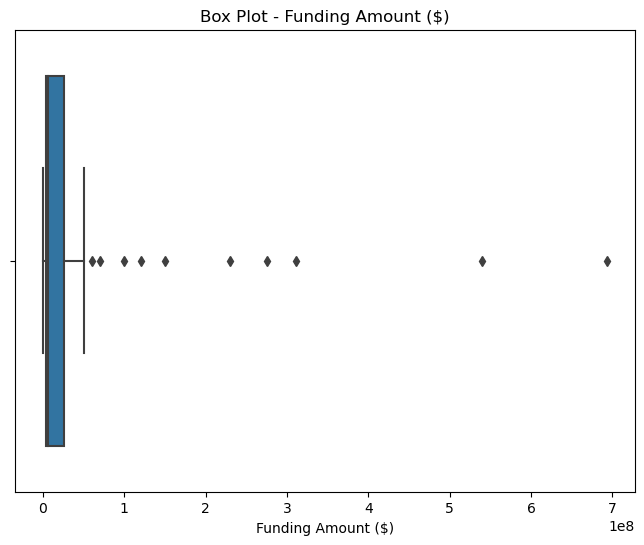

In [47]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Funding Amount ($)'])
plt.title('Box Plot - Funding Amount ($)')
plt.xlabel('Funding Amount ($)')
plt.show()

### Handle Outliers

In [48]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Funding Amount ($)')
print("Number of Outliers: {}".format(len(outliers)))
print()

# removing outliers:
data_2019 = data_2019[~data_2019['Funding Amount ($)'].isin(outliers['Funding Amount ($)'])]

# Verify if outliers were handled
outliers_after_handling = detect_outliers(data_2019, 'Funding Amount ($)')
print("Number of Outliers after Handling: {}".format(len(outliers_after_handling)))

Number of Outliers: 10

Number of Outliers after Handling: 7


### After handling the outliers

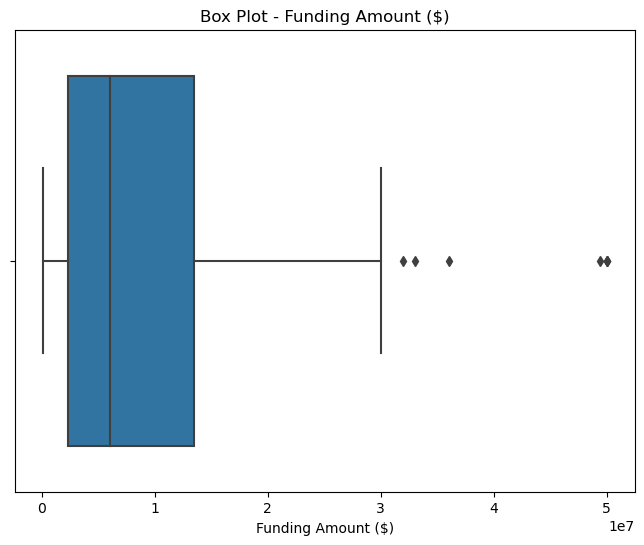

In [49]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Funding Amount ($)'])
plt.title('Box Plot - Funding Amount ($)')
plt.xlabel('Funding Amount ($)')
plt.show()

In [50]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Funding Amount ($)')
print("\nNumber of Outliers reduced to: {}".format(len(outliers)))
print()


Number of Outliers reduced to: 7



## **Explore Funding Round**

### Clean Funding Round names

In [51]:
#cleaning Funding round names
funding_round_replacement = {
    "Seed Round" : "Seed",
    "Pre series A": "Pre-series A",
    "Pre Series A" : "Pre-series A" ,
    "Seed round" :   "Seed",
    "Pre seed round" :"Pre-seed",
    "Series B2" :    "Series B",
    "Pre series B" : "Pre-series B",
    "Seed Funding" : "Seed",
    "Pre-Series B" : "Pre-series B",
    "Pre-Seed"  :    "Pre-seed",
    "Seed funding" : "Seed",
    "Pre-seed Round" :"Pre-seed",
    "Series E2" :     "Series E",
    "Pre series A1" : "Pre-series A",
    "Series D1" :     "Series",
    "Pre seed Round" :"Pre-seed",
    "Pre series C"  : "Pre-Series C",
    "Bridge Round" :  "Bridge",
    "Series A-1" :    "Series",
    "Pre- series A":  "Pre-series A",
    "Seed Investment" :"Seed"
}
data_2019['Funding Round'] = data_2019['Funding Round'].replace(funding_round_replacement)

### Handle missing values

In [52]:
data_2019['Funding Round'] = data_2019['Funding Round'].fillna('Unknown')

## Preview after Data cleaning

### check for any missing values in the dataset



 No missing values found. Data cleaning is complete


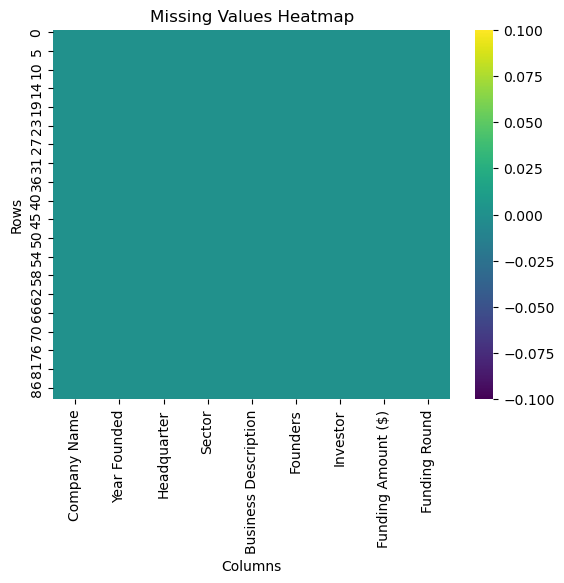

In [53]:
# check for any missing values
missing_values = data_2019.isnull().sum()
if missing_values.any():
    print("\n\nMissing values still exist in the dataset")
else:
    print("\n\n No missing values found. Data cleaning is complete")

# plot missing values
plot_missing_values_heatmap(data_2019)

### Check for Duplicates

In [54]:
duplicates = data_2019.duplicated()
if duplicates.any():
    print("\n\nDuplicate records still exist in the dataset.")
else:
    print("\n\nNo duplicate records found. Data cleaning is complete.")




No duplicate records found. Data cleaning is complete.
